# 9.1 K-means 聚类

假设我们有一组 $D$ 维的数据 $\{\mathbf x_1,\dots,\mathbf x_N\}$，我们的目的是将其分成 $K$ 类。

直觉上，我们认为同一类数据点的类内距离应当比不同类数据点的类间聚类要小。因此，我们引入一组 $D$ 维向量 $\mathbf \mu_k, k=1,\dots,K$，$\mathbf\mu_k$ 表示属于一个第 $k$ 类的样例（在之后的推导中知道，我们可以将 $\mathbf \mu_k$ 认为是每个类的中心点）。

目标是找到数据点分别隶属的类，以及一组向量$\{\mu_k\}$,使得每个数据点和与它最近的向量
$\mu_k$之间的距离的平方和最小,$r_{nk}\in\{0,1\}$

引入二值指示变量$r_{nk}\in\{0,1\}$，1-of-k表示方式,目标函数:
$$J=\sum_{n=1}^N\sum_{k=1}^Nr_{nk}\Vert x_n-\mu_k\Vert^2$$

首先，为$\mu_k$选择初始值

第一阶段，关于$r_{nk}$最小化J,保持$\mu_k$固定
$$r_{nk}=\begin{cases}1&if& k=argmin_j\Vert x_n-\mu_j\Vert^2\\0&otherwise\end{cases}$$
第二阶段，考虑$r_{nk}$固定时，关于$\mu_k$最优化,令J对$\mu_k$求导可得:
$$\mu_k=\frac{\sum_nr_{nk}x_n}{\sum_nr_{nk}}$$
即令$\mu_k$等于类别k的所有数据点的均值

In [1]:
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
from prml.clusterings import KMeans
%matplotlib inline

In [2]:
# training data
x1 = np.random.normal(size=(200, 2))
x1 += np.array([-3, -3])
x2 = np.random.normal(size=(200, 2))
x2 += np.array([3, -3])
x3 = np.random.normal(size=(200, 2))
x3 += np.array([0, 3])
x_train = np.vstack((x1, x2, x3))
print(x_train.shape)
x0, x1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
x = np.array([x0, x1]).reshape(2, -1).T

(600, 2)


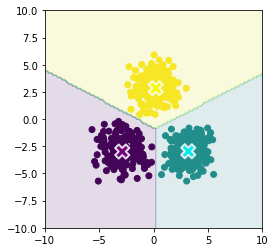

In [3]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)
cluster = kmeans.predict(x_train)
plt.scatter(x_train[:, 0], x_train[:, 1], c=cluster)
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], s=200, marker='X', lw=2, c=['purple', 'cyan', 'yellow'], edgecolor="white")
plt.contourf(x0, x1, kmeans.predict(x).reshape(100, 100),alpha=0.15)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')

In [19]:
kmeans.predict(x_train).shape

(600,)